In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate,StratifiedKFold,cross_val_score
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.feature_selection import VarianceThreshold,SelectKBest,chi2,SelectFromModel
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,mean_squared_error
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from collections import Counter
from scipy.stats import norm

# Import Data

In [3]:
npf = pd.read_csv('../data/npf_train.csv')

In [4]:
test = pd.read_csv('../data/npf_test_hidden.csv')

We are going to only use the columns of the means. The test data only contains the features, not the labels, so we are loading the data, and we will only use it for our final predictions, and we cannot test those.

In [5]:
colss = []
for i in npf.columns:
    if 'mean' in i:
        colss.append(i)

In [6]:
X_train = npf[colss]
X_test = test[colss]

We will use two types of labels, one for the binary classification and one for the multiclass classificacion

In [7]:
y_train = (npf['class4'] != 'nonevent').astype(int)

In [8]:
npf['class4'] = npf['class4'].astype('category')

In [9]:
list_cat = npf['class4'].cat.categories.tolist()

In [10]:
y_train_mult = npf['class4'].cat.codes

In [11]:
list_cat

['II', 'Ia', 'Ib', 'nonevent']

In [12]:
#npf.columns.to_list()

In [13]:
cols_co = []
for i in npf.columns:
    if 'CO' in i:
        cols_co.append(i)

In [14]:
npf[cols_co].describe()

,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,382.072525,3.129971,382.086831,2.940651,382.977945,3.991636,381.990305,2.718960
std,11.080110,3.222030,11.055166,2.973224,10.665746,4.184408,11.067589,2.696396
min,359.579024,0.053968,359.096905,0.048990,361.904203,0.111492,358.786190,0.037417
25%,374.398155,0.845635,374.389589,0.789586,375.410833,0.949196,374.324536,0.781563
50%,380.814198,1.952732,380.727947,1.899320,381.600970,2.272311,380.632912,1.758853
75%,389.048782,4.428063,389.028476,4.141001,389.731608,5.960286,388.973036,3.903496
max,421.511176,19.460521,421.057843,17.439857,422.627800,20.851661,419.924510,16.656066


In [15]:
cols_uv = []
for i in npf.columns:
    if 'UV' in i:
        cols_uv.append(i)

In [16]:
npf[cols_uv].describe()

,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std
count,464.000000,464.000000,464.000000,464.000000
mean,10.623039,7.450957,0.428800,0.366484
std,6.641686,4.989293,0.316118,0.287019
min,0.295937,0.177836,0.005140,0.003552
25%,4.236750,2.431709,0.125858,0.086265
50%,11.327445,7.588452,0.402249,0.334264
75%,16.460523,11.827837,0.669968,0.589098
max,22.541204,16.830501,1.197271,1.055615


In [17]:
cols_nox = []
for i in npf.columns:
    if 'NOx' in i:
        cols_nox.append(i)

In [18]:
npf[cols_nox].describe()

,NOx168.mean,NOx168.std,NOx336.mean,NOx336.std,NOx42.mean,NOx42.std,NOx504.mean,NOx504.std,NOx672.mean,NOx672.std,NOx84.mean,NOx84.std
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,1.524826,0.513098,1.515605,0.513671,1.539901,0.629941,1.500263,0.524602,1.485461,0.501666,1.523097,0.524541
std,1.562047,0.567170,1.550865,0.588911,1.561838,0.965904,1.534103,0.639183,1.509143,0.539275,1.556202,0.570919
min,0.094902,0.036056,0.095000,0.057799,0.088827,0.066777,0.083580,0.056787,0.083800,0.051221,0.100494,0.057885
25%,0.508232,0.219415,0.505776,0.209040,0.535792,0.232373,0.498524,0.205190,0.500160,0.209008,0.505098,0.220157
50%,1.023372,0.350916,1.018741,0.341148,1.030888,0.369631,1.021234,0.345345,1.006570,0.344222,1.028947,0.357782
75%,2.011767,0.621585,1.992565,0.620956,1.975454,0.702948,1.957519,0.621621,1.964400,0.593114,2.004526,0.653744
max,12.634286,6.269858,12.544643,6.066214,12.332321,12.423140,12.247500,5.939282,12.037857,5.921116,12.454727,6.212959


In [19]:
npf['NOx168.mean'].idxmax()

437

In [20]:
npf.loc[437]

id                    438
date           2011-01-05
class4           nonevent
partlybad           False
CO2168.mean    421.511176
                  ...    
UV_A.std          0.83385
UV_B.mean        0.049601
UV_B.std         0.023256
CS.mean           0.00429
CS.std           0.000234
Name: 437, Length: 104, dtype: object

In [21]:
npf[['CO2168.mean','CO2168.std']]

,CO2168.mean,CO2168.std
0,368.771711,0.310309
1,378.197295,1.001493
2,373.043158,0.749865
3,375.643019,0.558629
4,377.661030,0.408421
...,...,...
459,381.016623,4.411571
460,383.698146,8.418351
461,379.279128,12.045785
462,384.443758,6.413297


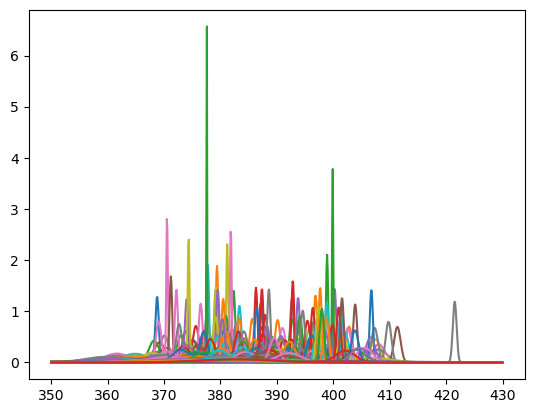

In [22]:
x_axis = np.arange(350,430, 0.1)

for i, r in npf[['CO2168.mean','CO2168.std']].iterrows():
    plt.plot(x_axis, norm.pdf(x_axis, r['CO2168.mean'], r['CO2168.std']))

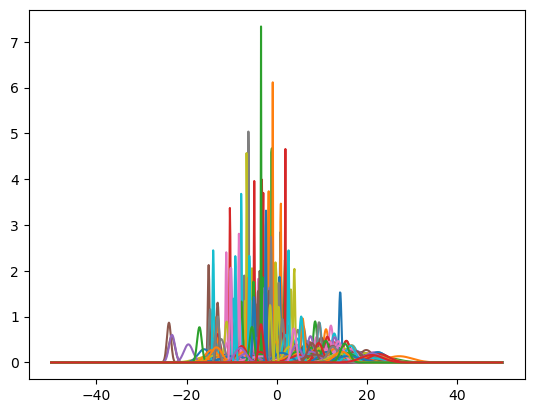

In [23]:
x_axis = np.arange(-50,50, 0.1)

for i, r in npf[['T672.mean', 'T672.std']].iterrows():
    plt.plot(x_axis, norm.pdf(x_axis, r['T672.mean'], r['T672.std']))

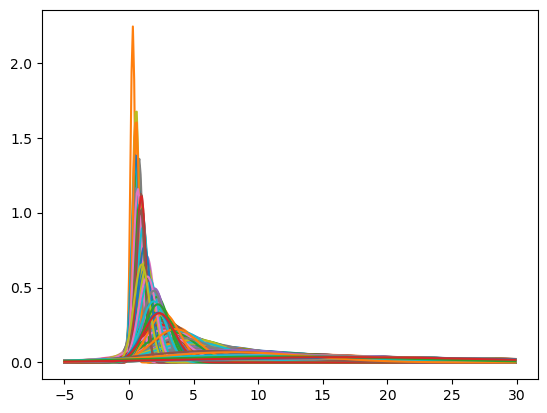

In [24]:
x_axis = np.arange(-5,30, 0.1)

for i, r in npf[['UV_A.mean', 'UV_A.std']].iterrows():
    plt.plot(x_axis, norm.pdf(x_axis, r['UV_A.mean'], r['UV_A.std']))

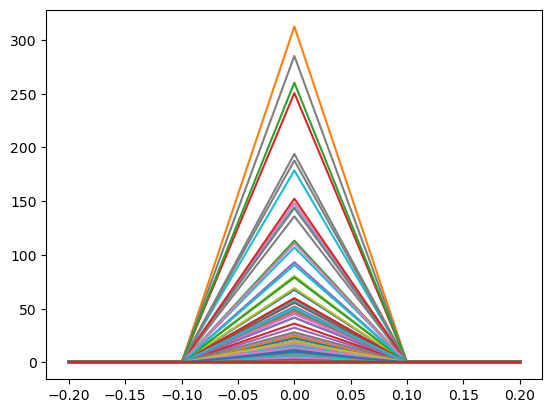

In [25]:
x_axis = np.arange(-0.2,0.3, 0.1)

for i, r in npf[['CS.mean', 'CS.std']].iterrows():
    plt.plot(x_axis, norm.pdf(x_axis, r['CS.mean'], r['CS.std']))

## PCA

The data for PCA must be scaled first to 0 mean and unit variance. Then, we are testing which is the value of k that give us the most information.

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

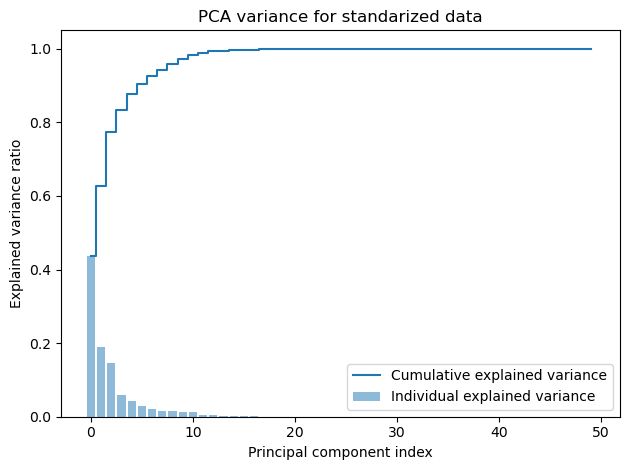

In [27]:
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("PCA variance for standarized data")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(n_components=18)
X_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test_sc)

In [29]:
svc = SVC(random_state=42)
svc.fit(X_pca,y_train)
y_pred = svc.predict(X_test_pca)
#accuracy_score(y_test,y_pred)

In [30]:
X_train_copy = X_train
y_train_copy = y_train
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train, test_size=0.75, random_state=42)

In [31]:
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('SVC',SVC(random_state=42))])

In [32]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=18)),
                ('SVC', SVC(random_state=42))])

In [33]:
y_pred = pipe.predict(X_val)

In [34]:
accuracy_score(y_val,y_pred)

0.8879310344827587

In [35]:
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('log',LogisticRegression())])

In [36]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=18)),
                ('log', LogisticRegression())])

In [37]:
y_pred = pipe.predict(X_val)

In [38]:
accuracy_score(y_val,y_pred)

0.8850574712643678

In [39]:
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('poly',PolynomialFeatures(2)),('log',LogisticRegression(solver='saga',max_iter=5000))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=18)),
                ('poly', PolynomialFeatures()),
                ('log', LogisticRegression(max_iter=5000, solver='saga'))])

In [40]:
y_pred = pipe.predict(X_val)
accuracy_score(y_val,y_pred)

0.8304597701149425

In [41]:
pipeline = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('RF',RandomForestClassifier(max_depth=2, random_state=0))])

In [42]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=18)),
                ('RF', RandomForestClassifier(max_depth=2, random_state=0))])

In [43]:
y_pred = pipeline.predict(X_val)

In [44]:
accuracy_score(y_val,y_pred)

0.8850574712643678

In [45]:
sum_e = y_train.sum()/len(y_train)
sum_ne= 1-sum_e

In [46]:
def prob_bin(y,pe,pne):
    y_prods = np.where(y==1,pe,pne)
    return y_prods

In [47]:
def prob_b(y,pe,pne):
    y_prods = np.where(y!=3,pe,pne)
    return y_prods

In [99]:
def perplexity_mult(X_tr, y_tr, X_te, y_te,m):
    m = m.fit(X_tr, y_tr)
    y_pred = m.predict(X_te)
    y_pred_bin = (y_pred != 3).astype(int)
    try:
        y_probs = pipe.predict_proba(X_te)
        y_probs = y_probs[:,0:3].sum(axis=1)
    except e:
        y_prods = prob_b(y_pred_bin,sum_e,sum_ne)
    return np.exp(-np.mean(np.log(y_pred_bin*y_probs + (1 - y_pred_bin) * (1 - y_probs))))

In [49]:
def perplexity_bin(X_tr, y_tr, X_te, y_te,m):
    m = m.fit(X_tr, y_tr)
    y_pred = m.predict(X_te)
    try:
        y_probs = pipe.predict_proba(X_te)[:,1]
    except e:
        y_prods = prob_bin(y_pred,sum_e,sum_ne)
    return np.exp(-np.mean(np.log(y_pred*y_probs + (1 - y_pred) * (1 - y_probs))))

In [50]:
def loss(X_tr, y_tr, X_te, y_te, m):
    return mean_squared_error(y_te, m.fit(X_tr, y_tr).predict(X_te), squared=False)

In [51]:
def acc_m(X_tr, y_tr, X_te, y_te, m):
    return accuracy_score(y_te, m.fit(X_tr, y_tr).predict(X_te))

In [52]:
# All requested models are implemented by sklearn, luckily
models = [GaussianNB(),
          Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('NB',GaussianNB())]),
          Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('log',LogisticRegression(solver='saga',max_iter=5000))]),
          Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('svc',SVC(random_state=42,probability=True,C = 1,class_weight = None,gamma='scale',kernel='rbf',decision_function_shape = 'ovo'))]),
          Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('RF',RandomForestClassifier(max_depth=2, random_state=0))])]
# It is a good idea to collect the results in a data frame, one row for a regressor.
res_bin = pd.DataFrame(index=["NB_alone","NB","Log", "SVR", "RF"])

In [53]:
# Loss on training data, for model trained on training data:
res_bin["loss_train"] = [loss(X_train,y_train, X_train,y_train, m) for m in models]
# Los on test data, for model trained on training data:
res_bin["loss_val"] = [loss(X_train,y_train, X_val, y_val, m) for m in models]

res_bin["acc_val"] = [acc_m(X_train,y_train, X_val, y_val, m) for m in models]

res_bin["perp_bin"] = [perplexity_bin(X_train,y_train, X_val, y_val, m) for m in models]
# Cross-validation loss:
cv = StratifiedKFold(n_splits=5)
res_bin["cv"] = [
    -cross_val_score(
        m, X_train_copy,y_train_copy, cv=cv, scoring="neg_root_mean_squared_error"
    ).mean()
    for m in models
]

In [54]:
res_bin

,loss_train,loss_val,acc_val,perp_bin,cv
NB_alone,0.393919,0.386556,0.850575,1.644902,0.419179
NB,0.334767,0.428845,0.816092,1.869961,0.444872
Log,0.321634,0.339032,0.885057,1.493934,0.353485
SVR,0.334767,0.334767,0.887931,1.444701,0.356427
RF,0.160817,0.339032,0.885057,1.560235,0.377264


## Grid Search

The truth is that this did not improve the models, the best model found gives the same accuracy that we got before.

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [56]:
pca = PCA(n_components=18)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

In [57]:
parameters = {'n_estimators':[10,70,100,150], 'min_samples_leaf':[1, 2,3],
              'min_samples_split':[2,3,4],
              'max_features':['sqrt','log2',None]}
rf = RandomForestClassifier(max_depth=2, random_state=0,n_jobs=-1)

In [58]:
clf = GridSearchCV(rf, parameters)

In [59]:
clf.fit(X_train_pca,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=2, n_jobs=-1,
                                              random_state=0),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 70, 100, 150]})

In [60]:
clf.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [61]:
y_pred  = clf.predict(X_val_pca)

In [62]:
accuracy_score(y_val,y_pred)

0.882183908045977

In [63]:
parameters = {'gamma':['scale','auto',0.3,0.5,1,3], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[2,3,4],'C':[0.1,1,5],'class_weight':[None,'balanced']}
svc = SVC(random_state=42)

In [64]:
clf_scv = GridSearchCV(svc, parameters)

In [65]:
clf_scv.fit(X_train_pca,y_train)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 5], 'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.3, 0.5, 1, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [66]:
clf_scv.best_params_

{'C': 1, 'class_weight': None, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

In [67]:
y_pred = clf_scv.predict(X_val_pca)

In [68]:
accuracy_score(y_val,y_pred)

0.8793103448275862

# Multiclass test

In [69]:
X_train = npf[colss]

In [70]:
X_train_mult,X_val_mult,y_train_mult2,y_val_mult = train_test_split(X_train,y_train_mult, test_size=0.25, random_state=42,stratify=y_train_mult)

In [71]:
y_val_b = (y_val_mult != 3).astype(int)

In [72]:
def perplexity(p,y_test):
    return np.exp(-np.mean(np.log(y_test*p + (1 - y_test) * (1 - p))))

In [100]:
def perplexity_mult2(p,y_test):
    return np.exp(-np.mean(np.log(y_test*p + (1 - y_test) * (1 - p))))

In [74]:
def acc_pipe_model_mult(name,model,can_prob):
    pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=20)),(name,model)])
    pipe.fit(X_train_mult,y_train_mult2)
    y_pred = pipe.predict(X_val_mult)
    perp = 1
    if can_prob:
        y_probs = pipe.predict_proba(X_val_mult)
        perp = perplexity(y_probs[:,0:3].sum(axis=1),y_val_b)
    acc = accuracy_score(y_val_mult,y_pred)
    return acc,perp,pipe

In [75]:
svc = SVC(random_state=42,probability=True)
acc,perp, pipeline = acc_pipe_model_mult('svc',svc,True)
print(acc)
print(perp)

0.7068965517241379
1.2079715907495463


In [76]:
parameters = {'svc__gamma':['scale','auto',0.3,0.5,1,3], 'svc__kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'svc__degree':[2,3,4,5],'svc__C':[0.1,0.7,1,5],'svc__class_weight':[None,'balanced'],
              'svc__decision_function_shape':['ovo','ovr']}

In [77]:
clf_scv = GridSearchCV(pipeline, parameters)

In [78]:
clf_scv.fit(X_train_mult,y_train_mult2)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=20)),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=42))]),
             param_grid={'svc__C': [0.1, 0.7, 1, 5],
                         'svc__class_weight': [None, 'balanced'],
                         'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__degree': [2, 3, 4, 5],
                         'svc__gamma': ['scale', 'auto', 0.3, 0.5, 1, 3],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [79]:
clf_scv.best_params_

{'svc__C': 1,
 'svc__class_weight': None,
 'svc__decision_function_shape': 'ovo',
 'svc__degree': 2,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf'}

In [80]:
y_pred = clf_scv.predict(X_val_mult)

In [81]:
accuracy_score(y_val_mult,y_pred)

0.7068965517241379

In [82]:
confusion_matrix(y_val_mult,y_pred)

array([[17,  0,  4,  7],
       [ 5,  0,  3,  1],
       [ 8,  0, 10,  3],
       [ 3,  0,  0, 55]], dtype=int64)

C:\Users\srodriguezb\Anaconda3\envs\introds\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


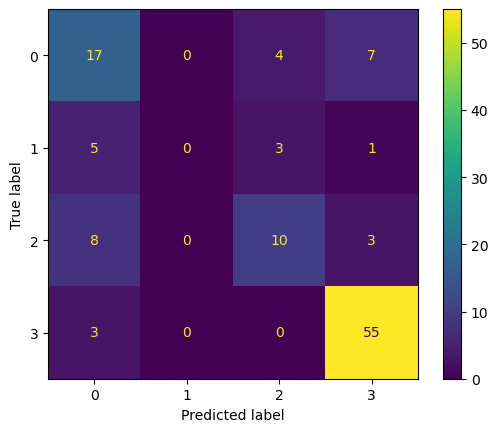

In [83]:
plot_confusion_matrix(clf_scv,X_val_mult,y_val_mult)

In [84]:
svc = SVC(random_state=42,probability=True,C = 1,class_weight = None,gamma='scale',kernel='rbf',decision_function_shape = 'ovo')
pipe_svc = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=20)),('svc',svc)])

In [85]:
cv = StratifiedKFold(n_splits=5)
cv_results = cross_validate(pipe_svc, X_train, y_train_mult,cv=cv,scoring='accuracy')
cv_results

{'fit_time': array([0.0379951 , 0.04099798, 0.04700255, 0.05199981, 0.03799677]),
 'score_time': array([0.00500178, 0.00299978, 0.00599861, 0.00500369, 0.00399971]),
 'test_score': array([0.65591398, 0.61290323, 0.70967742, 0.74193548, 0.64130435])}

In [86]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [87]:
acc, perp,pipeline = acc_pipe_model_mult('svc',svc,True)
print(acc)
print(perp)

0.7068965517241379
1.2079715907495463


In [88]:
log_l1 = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', C=1.0,max_iter=2000)
acc, perp,pipeline = acc_pipe_model_mult('log_l1',log_l1,True)
print(acc)
print(perp)

0.6724137931034483
1.2187076825000311


In [89]:
log_ovr = LogisticRegression(multi_class='ovr', solver='saga', penalty='l2', C=1.0,max_iter=2000)
acc,perp, pipeline_l = acc_pipe_model_mult('log_ovr',log_ovr,True)
print(acc)
print(perp)

0.6724137931034483
1.2535097638769146


In [90]:
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('poly',PolynomialFeatures(2)),('log',LogisticRegression(solver='saga',max_iter=5000))])

In [91]:
pipe.fit(X_train_mult,y_train_mult2)
y_pred = pipe.predict(X_val_mult)
acc = accuracy_score(y_val_mult,y_pred)
acc

0.7068965517241379

In [92]:
rf = RandomForestClassifier(max_depth=2, random_state=0,max_features= 'sqrt')
acc,_, pipeline = acc_pipe_model_mult('rf',rf,False)
print(acc)

0.603448275862069


In [93]:
list_cat

['II', 'Ia', 'Ib', 'nonevent']

In [94]:
# All requested models are implemented by sklearn, luckily
models = [Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('log',LogisticRegression(solver='saga',max_iter=5000))]),
          Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('svc',SVC(random_state=42,probability=True,C = 1,class_weight = None,gamma='scale',kernel='rbf',decision_function_shape = 'ovo'))]),
          Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('rf',RandomForestClassifier(max_depth=2, random_state=0,max_features= 'sqrt'))])]
# It is a good idea to collect the results in a data frame, one row for a regressor.
res = pd.DataFrame(index=["Log", "SVR", "RF"])

In [97]:
sum_e = 0
sum_ne= 0
for i,j in Counter(y_train_mult2).items():
    if i != 3:
        sum_e += j/len(y_train_mult2)
    else:
        sum_ne = j/len(y_train_mult2)

In [101]:
# Loss on training data, for model trained on training data:
res["loss_train"] = [loss(X_train_mult, y_train_mult2, X_train_mult, y_train_mult2, m) for m in models]
# Los on test data, for model trained on training data:
res["loss_val"] = [loss(X_train_mult, y_train_mult2, X_val_mult, y_val_mult, m) for m in models]

res["acc_val"] = [acc_m(X_train_mult, y_train_mult2, X_val_mult, y_val_mult, m) for m in models]

res["perp_bin"] = [perplexity_mult(X_train_mult, y_train_mult2, X_val_mult, y_val_mult, m) for m in models]
# Cross-validation loss:
cv = StratifiedKFold(n_splits=4)
res["cv"] = [
    -cross_val_score(
        m, X_train,y_train_mult, cv=cv, scoring="neg_root_mean_squared_error"
    ).mean()
    for m in models
]

In [102]:
res

,loss_train,loss_val,acc_val,perp_bin,cv
Log,1.129541,1.125718,0.689655,1.214729,1.249056
SVR,1.115461,1.148462,0.706897,1.161488,1.213771
RF,1.325046,1.364576,0.594828,2.051131,1.445413


In [103]:
pipe = Pipeline([('scaler',StandardScaler()),('pca',PCA(n_components=18)),('svc',SVC(random_state=42,probability=True,C = 1,class_weight = None,gamma='scale',kernel='rbf',decision_function_shape = 'ovo'))])
pipe.fit(X_train_mult, y_train_mult2)
y_pred = pipe.predict(X_val_mult)
y_probs = pipe.predict_proba(X_val_mult)

In [104]:
#The model must be already trained and must be able to output probabilities
def generate_answers(model):
    y_pred = model.predict(X_test)
    y_pred_proba= model.predict_proba(X_test)
    df = pd.DataFrame()
    p_f = []
    lab = []
    for i,p in zip(y_pred,y_pred_proba):
        if i == 3:
            p_f.append(p[i])
            lab.append(list_cat[i])
        else:
            p_f.append(p[:3].sum())
            lab.append(list_cat[i])
    df['class4'] = lab
    df['p'] = p_f
    df.to_csv('../data/answers.csv',index=False)

#TODO Calculate perplexity  
#TODO Improve the multiclass prediction  
#TODO If we don't use a classifier that gives probabilities, we have to return the probability for each class, like the prior I think.

In [105]:
generate_answers(pipe)